In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from sklearn import cluster

fontP = FontProperties()
fontP.set_size('large')
reg_clr = dict(
    N  = 'm',
    C  = 'r',
    W  = 'g',
    E  = 'b',
    S  = 'k',
    NE = 'y',
)
regs = 'N NE E S W C'.split()

%matplotlib inline

In [2]:
data = pd.read_csv('items_test.csv', encoding='utf-8')
data.drop(data[data.name == 'เขื่อนเจ้าพระยา'].index, inplace=True)
data.date = pd.to_datetime(data.date)
data['month'] = data.date.dt.month
data['year'] = data.date.dt.year
data.head()

,date,region,name,capacity,volume_total,volume_usable,volume_gain,volume_drain,month,year
0,2010-01-08,N,เขื่อนภูมิพล,13462.0,8311.0,4511.0,6.29,38.00,1,2010
1,2010-01-08,N,เขื่อนสิริกิติ์,9510.0,5285.0,2436.0,11.12,20.15,1,2010
2,2010-01-08,N,เขื่อนแม่งัด,265.0,228.0,206.0,0.16,0.36,1,2010
3,2010-01-08,N,เขื่อนกิ่วลม,112.0,85.0,81.0,0.69,0.85,1,2010
4,2010-01-08,N,เขื่อนแม่กวง,263.0,77.0,63.0,0.47,0.59,1,2010


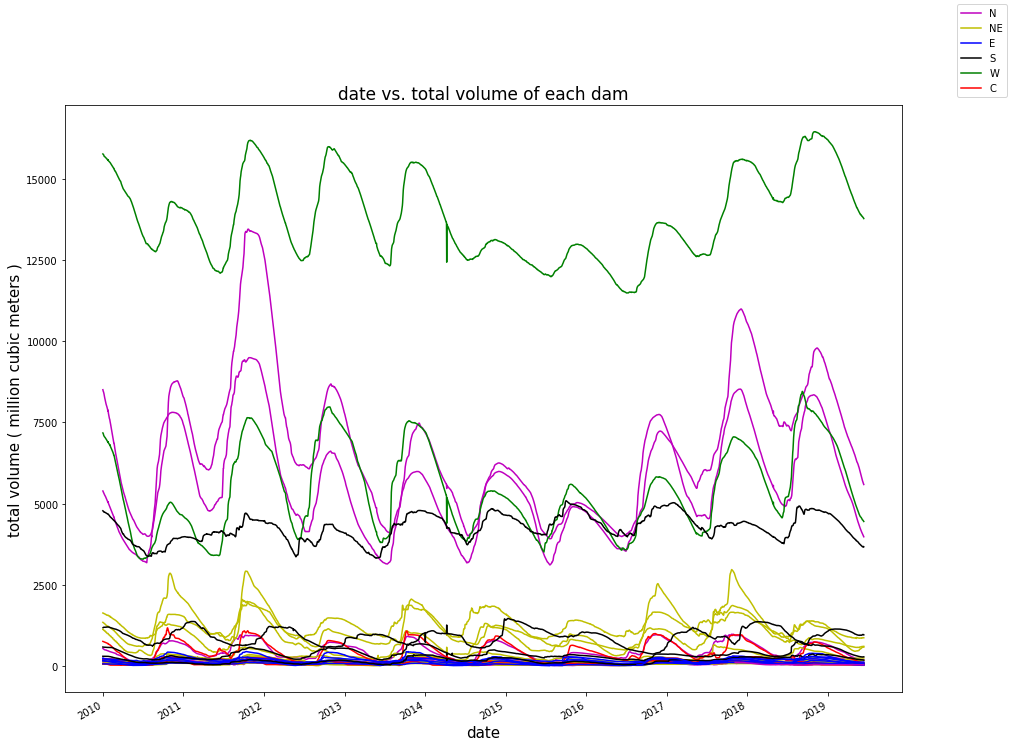

In [3]:
title_size, label_size, legend_size = 17, 15, 10

fig, ax = plt.subplots(figsize=(15, 12))

ax.set_title('date vs. total volume of each dam', loc='center', fontsize=title_size)
ax.set_ylabel('total volume ( million cubic meters )', fontsize=label_size)
ax.set_xlabel('date', fontsize=label_size)

names = list(data.name.unique())
for i, name in enumerate(names):
    t = data[data.name == name]
    reg = t.region.iloc[0]
    p = t.plot(
        x='date', y='volume_total', ax=ax, label='d{:02}'.format(i), legend=False, color=reg_clr[reg]
    )
handles_reg, labels = ax.get_legend_handles_labels()
leg = fig.legend(handles_reg, regs, fontsize=legend_size,)

for i, r in enumerate(regs):
    leg.legendHandles[i].set_color(reg_clr[r])

high : เขื่อนศรีนครินทร์

medium : เขื่อนภูมิพล, เขื่อนรัชชประภา, เขื่อนวชิราลงกรณ, เขื่อนสิริกิติ์

low : เขื่อนกระเสียว, เขื่อนกิ่วคอหมา, เขื่อนกิ่วลม, เขื่อนขุนด่านปราการชล, เขื่อนคลองสียัด, เขื่อนจุฬาภรณ์, เขื่อนทับเสลา, เขื่อนนฤบดินทรจินดา, เขื่อนน้ำพุง, เขื่อนน้ำอูน, เขื่อนบางพระ, เขื่อนบางลาง, เขื่อนประแสร์, เขื่อนปราณบุรี, เขื่อนป่าสักฯ, เขื่อนมูลบน, เขื่อนลำตะคอง, เขื่อนลำนางรอง, เขื่อนลำปาว, เขื่อนลำพระเพลิง, เขื่อนลำแซะ, เขื่อนสิรินธร, เขื่อนหนองปลาไหล, เขื่อนห้วยหลวง, เขื่อนอุบลรัตน์, เขื่อนแก่งกระจาน, เขื่อนแควน้อย, เขื่อนแม่กวง, เขื่อนแม่งัด, เขื่อนแม่มอก



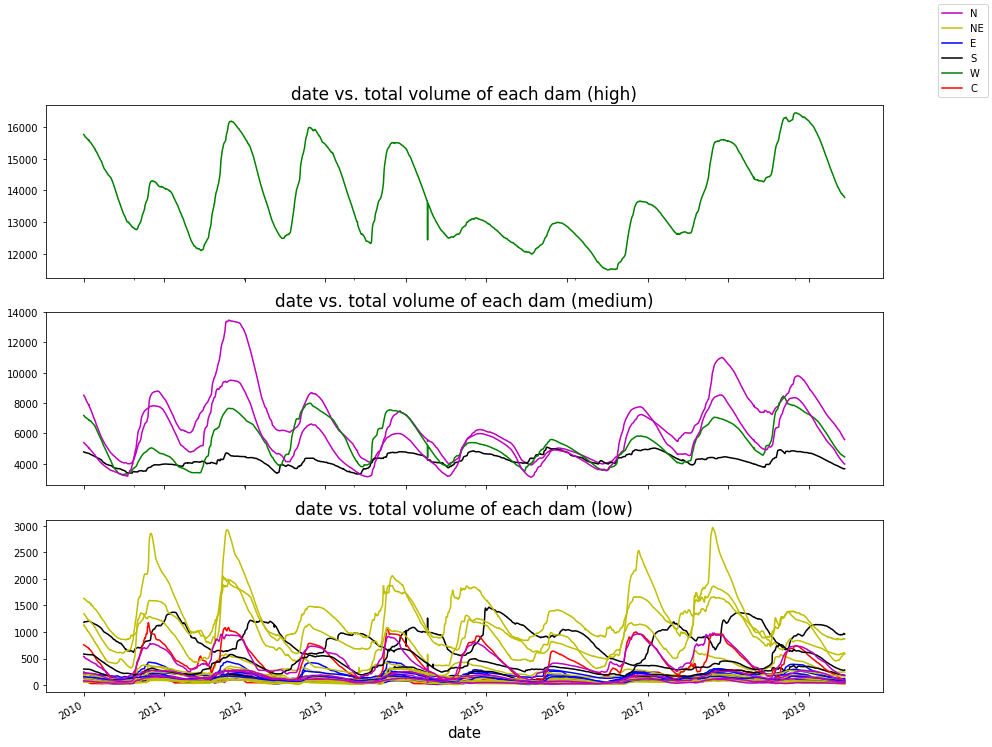

In [4]:
title_size, label_size, legend_size = 17, 15, 10

t = data.groupby('name')['volume_total'].mean()
names = t.index

cls = cluster.KMeans(n_clusters=3)
cls.fit(t.values.reshape((t.shape[0], 1)))

fig, axs = plt.subplots(nrows=3, figsize=(15, 12), sharex=True)

plt.xlabel('date', fontsize=label_size)

groups = []
for i in range(3):
    group = []
    means = []
    for name in names[cls.labels_ == i]:
        t = data[data.name == name]
        group.append(t)
        means.append(t['volume_total'].mean())
    groups.append((group, sum(means)/len(means)))
groups.sort(key=lambda p: p[1], reverse=True)
for i, x in enumerate(zip(groups, 'high medium low'.split())):
    group, lv = x
    axs[i].set_title(
        'date vs. total volume of each dam ({})'.format(lv),
        loc='center',
        fontsize=title_size
    )
    
    ns = []
    for t in group[0]:
        reg = t.region.iloc[0]
        p = t.plot(
            x='date', y='volume_total', ax=axs[i], legend=False, color=reg_clr[reg]
        )
        ns.append(t.name.iloc[0])
    print(lv, ':',', '.join(ns), end='\n'*2)
leg = fig.legend(handles_reg, regs, fontsize=legend_size,)

for i, r in enumerate(regs):
    leg.legendHandles[i].set_color(reg_clr[r])

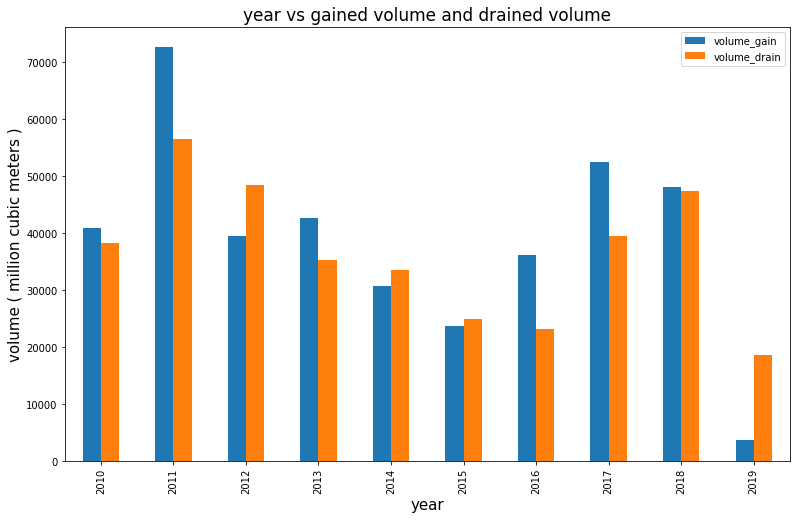

In [5]:
title_size, label_size, legend_size = 17, 15, 10

fig, ax = plt.subplots(figsize=(13, 8))
data.groupby('year')[['volume_gain', 'volume_drain']].sum().plot.bar(ax=ax)

ax.set_title('year vs gained volume and drained volume', loc='center', fontsize=title_size)
ax.set_ylabel('volume ( million cubic meters )', fontsize=label_size)
ax.set_xlabel('year', fontsize=label_size)

ax.legend(fontsize=legend_size)

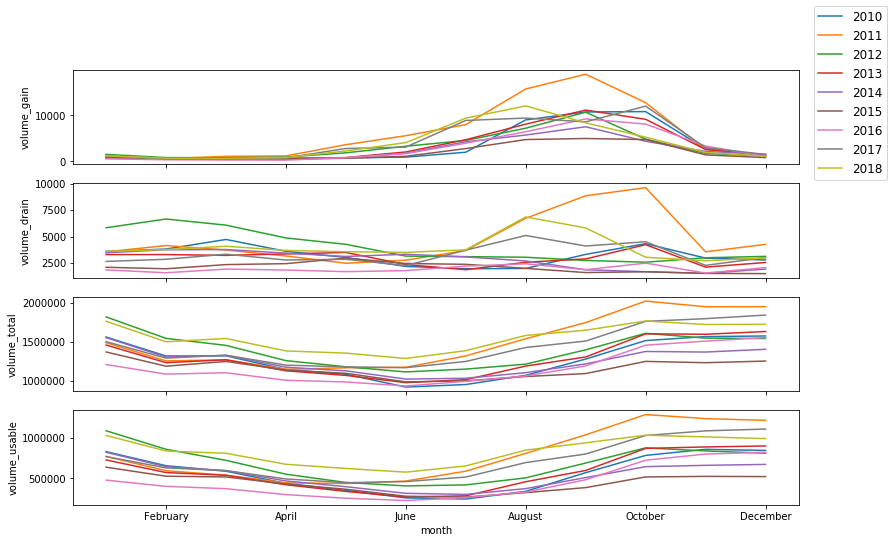

In [6]:
cols = ['volume_gain', 'volume_drain', 'volume_total', 'volume_usable']

fig, axs = plt.subplots(4, 1, figsize=(13, 8), sharex=True)
plt.xticks(range(2, 13, 2), "February April June August October December".split())

ts = [
    data.pivot_table(values=col, columns='year', index='month', aggfunc='sum')
    for col in cols
]

for col, ax, t in zip(cols, axs, ts):
    t.iloc[:, :-1].plot(ax=ax, legend=False)
    ax.set_ylabel(col)
handles, labels = axs[0].get_legend_handles_labels()
_ = fig.legend(handles, labels, prop=fontP)